In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
data = pd.read_csv('modified_data.csv')

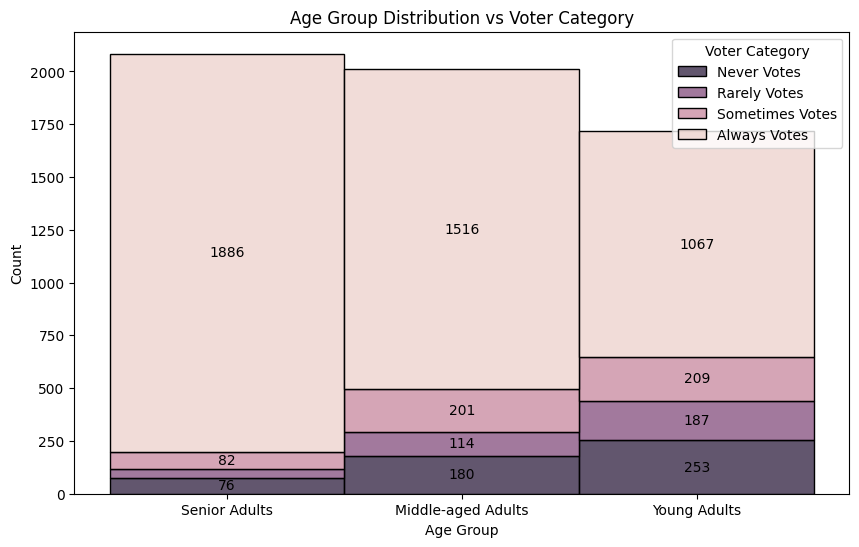

In [79]:
# plot histogram for Age_grp with Q24
temp = data[data['Q24'] != -1]
plt.figure(figsize=(10, 6))
sns_hist  = sns.histplot(data=temp, x='Age_grp', hue='Q24', multiple='stack')
# set data labels
plt.legend(title='Voter Category', labels=['Never Votes', 'Rarely Votes','Sometimes Votes', 'Always Votes'])
plt.title('Age Group Distribution vs Voter Category')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Annotate each section with data values
for p in sns_hist.patches:
    height = p.get_height()
    if height > 50:
        plt.annotate(f'{int(height)}', 
                     (p.get_x() + p.get_width() / 2., height/2+p.get_y()),
                     va = 'center', ha = 'center',)
plt.savefig('./Topic charts/topic-1.png', dpi=300, bbox_inches='tight')
plt.show()